# Recorte 1985 - 2002

In [1]:
# Importando bibliotecas necessárias para a construção de grafos
import netpixi
from netpixi.integration.gt import *
from regression.integration.gt import *
import pandas as pd
import numpy as np
import csv
import ast
import cpnet
from graph_tool import spectral
import seaborn as sns
import regression as reg
import cpnet

from scipy import stats
from matplotlib import pyplot as plt
from graph_tool import centrality
from graph_tool import spectral

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/usr/local/lib/python3.10/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1582: PendingDeprecationWarning: The register_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name, _cmap)
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1583: PendingDeprecationWarning: The register_cmap function will b

In [2]:
df = pd.read_csv('./Video_Games_Sales_as_at_22_Dec_2016.csv')
df.dropna(subset=['Publisher'], inplace=True)
#df = df.loc[~df['Critic_Score'].isna() & ~df['User_Score'].isna() & ~df['Rating'].isna()]

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_recortado = df.loc[(df['Year_of_Release'] >= 1985) & (df['Year_of_Release'] <= 2002)] 

In [5]:
df_recortado.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,NaN,NaN,NaN,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_recortado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3515 entries, 1 to 16712
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             3513 non-null   object 
 1   Platform         3515 non-null   object 
 2   Year_of_Release  3515 non-null   float64
 3   Genre            3513 non-null   object 
 4   Publisher        3515 non-null   object 
 5   NA_Sales         3515 non-null   float64
 6   EU_Sales         3515 non-null   float64
 7   JP_Sales         3515 non-null   float64
 8   Other_Sales      3515 non-null   float64
 9   Global_Sales     3515 non-null   float64
 10  Critic_Score     1192 non-null   float64
 11  Critic_Count     1192 non-null   float64
 12  User_Score       920 non-null    float64
 13  User_Count       920 non-null    float64
 14  Developer        1253 non-null   object 
 15  Rating           1247 non-null   object 
dtypes: float64(10), object(6)
memory usage: 466.8+ KB


In [7]:
df_recortado.Year_of_Release.value_counts()

2002.0    829
2001.0    482
1998.0    379
2000.0    350
1999.0    338
1997.0    289
1996.0    263
1995.0    219
1994.0    121
1993.0     62
1992.0     43
1991.0     41
1986.0     21
1989.0     17
1987.0     16
1990.0     16
1988.0     15
1985.0     14
Name: Year_of_Release, dtype: int64

In [8]:
publishers = df_recortado["Publisher"].unique()

In [9]:
sixth_console_generation_graph = Graph(directed=False) # não-dirigido
sixth_console_generation_graph.add_vp('Publisher')
sixth_console_generation_graph.add_vp('Games_released')
sixth_console_generation_graph.add_ep('strength')

for pub in publishers:
    sixth_console_generation_graph.add_vertex(pub)
    sixth_console_generation_graph.get_vertex(pub)['Publisher'] = pub
    num_games = df_recortado['Name'].loc[df_recortado["Publisher"] == pub].nunique() 
    sixth_console_generation_graph.get_vertex(pub)['Games_released'] = num_games

In [10]:
sorted_years = list(range(1985, 2003))
print(sorted_years)

[1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002]


In [11]:
df_list = []

margem = 4
for i in range(0, len(sorted_years), margem):
    df_list.append(df_recortado[df_recortado['Year_of_Release'].isin(sorted_years[i:i+margem])])

In [12]:
publisher_platforms = []
for db in df_list:
    publisher_platforms.append(db.groupby('Platform')['Publisher'].unique().to_dict())

In [13]:
# for i in df_recortado.pivot_table(columns=['Publisher', 'Platform'], aggfunc='size'):
#     print(i)
temp_dic = {}
for pub_list in db.groupby('Platform')['Publisher'].unique():
    for pub in pub_list:
        if pub in temp_dic:
            temp_dic[pub] += 1
        else:
            temp_dic[pub] = 1
            
for k in sorted(temp_dic, key=temp_dic.get, reverse=True):
    print(k, temp_dic[k])

Electronic Arts 8
Capcom 7
Namco Bandai Games 7
Atari 6
Konami Digital Entertainment 6
THQ 6
Infogrames 6
Activision 6
BAM! Entertainment 6
Sega 5
Vivendi Games 5
Ubisoft 5
TDK Mediactive 5
Midway Games 5
Acclaim Entertainment 5
Eidos Interactive 5
Virgin Interactive 5
Take-Two Interactive 5
Nintendo 4
Banpresto 4
Universal Interactive 4
Interplay 4
Empire Interactive 4
Rage Software 4
Tecmo Koei 4
Kemco 4
Enix Corporation 3
Unknown 3
Takara 3
Enterbrain 3
Titus 3
Zoo Digital Publishing 3
Hudson Soft 3
Swing! Entertainment 3
Codemasters 3
Atlus 3
Microids 3
LucasArts 3
Gathering of Developers 3
Natsume 2
LEGO Media 2
Spike 2
Activision Value 2
Sammy Corporation 2
Taito 2
Ignition Entertainment 2
Conspiracy Entertainment 2
Victor Interactive 2
Microsoft Game Studios 2
Sony Computer Entertainment 2
3DO 2
Success 2
Crave Entertainment 2
Xicat Interactive 2
From Software 2
SquareSoft 2
Imagineer 1
Majesco Entertainment 1
Rebellion 1
Jorudan 1
NewKidCo 1
Liquid Games 1
Disney Interactive St

In [14]:
for platform_dict in publisher_platforms:
    for platform, publishers in platform_dict.items():
        for i in range(len(publishers)):
            if i != len(publishers)-1:
                next_vertex = i+1
                while(next_vertex < len(publishers)):
                    if(publishers[i] != publishers[next_vertex] and not sixth_console_generation_graph.has_edge(publishers[i], publishers[next_vertex])):
                        sixth_console_generation_graph.add_edge(publishers[i], publishers[next_vertex])
                        sixth_console_generation_graph.get_edge(publishers[i], publishers[next_vertex])['strength'] = 1
                        next_vertex += 1
                    else:
                        sixth_console_generation_graph.get_edge(publishers[i], publishers[next_vertex])['strength'] += 1
                        next_vertex += 1

In [15]:
print('número de vértices de g:', sixth_console_generation_graph.num_vertices())

número de vértices de g: 256


In [16]:
print('número de arestaas de g:', sixth_console_generation_graph.num_edges())

número de arestaas de g: 12913


In [17]:
gt_save(sixth_console_generation_graph, 'sixth_console_generation_graph.net.gz')

In [18]:
g = gt_load('sixth_console_generation_graph.net.gz')
g = gt_clean(g)
cc = centrality.closeness(g)
g.add_vp('closeness', cc)
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'sixth_console_generation_sfdp.net.gz')

In [19]:
r = netpixi.render('sixth_console_generation_sfdp.net.gz', infinite=True);

In [20]:
r.vertex_scale('Games_released', 20, 50)
r.edge_scale('strength', 0.3, 4)
r.vertex_default(color=0xff8674, kscale = 4, bwidth=3, bcolor=0x000000)
r.edge_default(curve1=1, curve2=1)
r.vertex_set_key('Publisher')

In [21]:
r.vertex_scale('closeness', 10, 50)
r.vertex_set_key('Publisher')

# Análise

<AxesSubplot: xlabel='Global_Sales', ylabel='Count'>

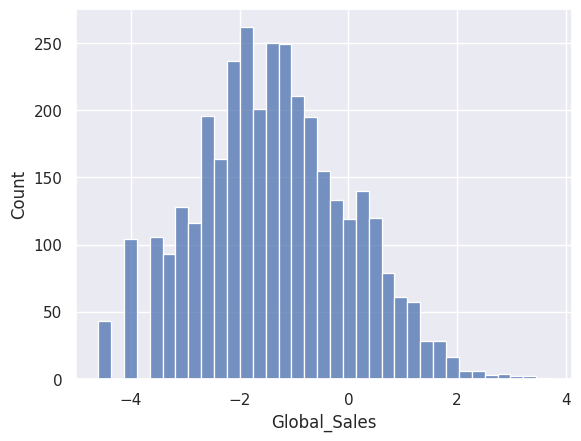

In [22]:
sns.histplot(np.log(df_recortado['Global_Sales']))

# Proximidade X Sucesso

In [23]:
df_pro_suc = df_recortado.copy()

In [24]:
g = gt_load("sixth_console_generation_sfdp.net.gz")

In [25]:
data = gt_data(g)
data.drop('Games_released', axis=1, inplace=True)
data.head()

,Publisher,closeness
id,,
Nintendo,Nintendo,0.639798
Take-Two Interactive,Take-Two Interactive,0.762763
Sony Computer Entertainment,Sony Computer Entertainment,0.779141
SquareSoft,SquareSoft,0.762763
Electronic Arts,Electronic Arts,0.900709


In [26]:
df_pro_suc = pd.merge(df_pro_suc, data, on = "Publisher", how = "inner")
df_pro_suc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3514 entries, 0 to 3513
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             3512 non-null   object 
 1   Platform         3514 non-null   object 
 2   Year_of_Release  3514 non-null   float64
 3   Genre            3512 non-null   object 
 4   Publisher        3514 non-null   object 
 5   NA_Sales         3514 non-null   float64
 6   EU_Sales         3514 non-null   float64
 7   JP_Sales         3514 non-null   float64
 8   Other_Sales      3514 non-null   float64
 9   Global_Sales     3514 non-null   float64
 10  Critic_Score     1192 non-null   float64
 11  Critic_Count     1192 non-null   float64
 12  User_Score       920 non-null    float64
 13  User_Count       920 non-null    float64
 14  Developer        1253 non-null   object 
 15  Rating           1247 non-null   object 
 16  closeness        3514 non-null   float64
dtypes: float64(11)

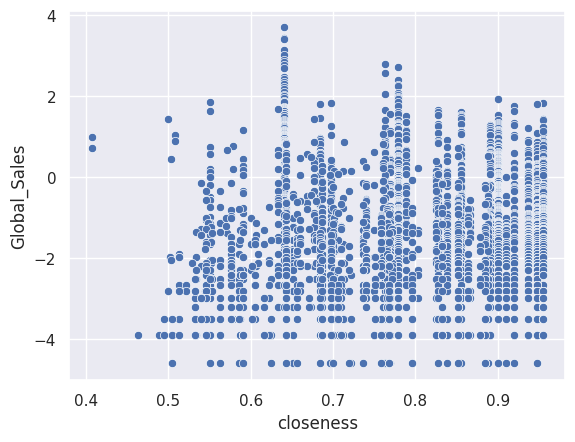

In [27]:
sns.scatterplot(x=df_pro_suc['closeness'], y=np.log(df_pro_suc['Global_Sales']));

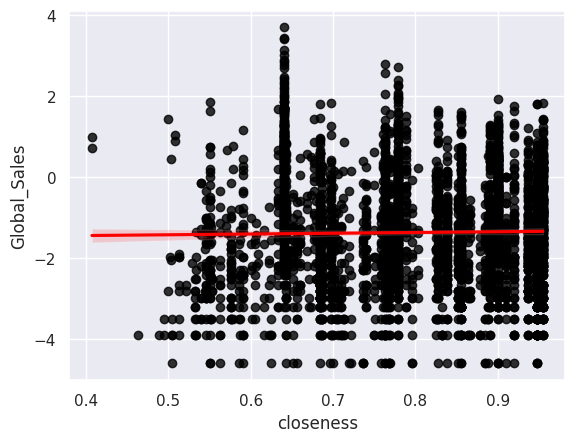

In [28]:
sns.regplot(x=df_pro_suc['closeness'], y=np.log(df_pro_suc['Global_Sales']), scatter_kws={"color": "black"}, line_kws={"color": "red"});

In [29]:
result = reg.linear(data=df_pro_suc, formula='np.log(Global_Sales) ~ closeness')

In [30]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Global_Sales)   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.000
Method:                   Least Squares   F-statistic:                    0.9366
Date:                  Mon, 21 Nov 2022   Prob (F-statistic):              0.333
Time:                          14:10:44   Log-Likelihood:                -6128.6
No. Observations:                  3514   AIC:                         1.226e+04
Df Residuals:                      3512   BIC:                         1.227e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5208      0.157     -9.707      0.000      -1.828      -1.214
closeness      0.1882      0.195      0.968      0.333      -0.193       0.570
==============================================================================
Omnibus:                       29.502   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.099
Skew:                           0.203   Prob(JB):                     4.80e-07
Kurtosis:                       2.817   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
result.micro_summary()

variable,coefficient,std error,p-value
closeness,0.188242,0.194509,0.333220


In [32]:
result.nano_summary()

+0.188 (0.195)


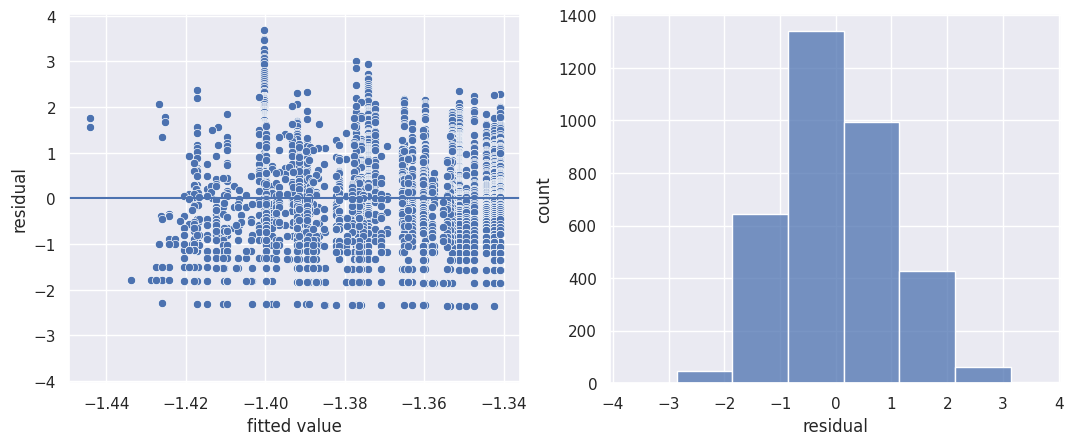

In [33]:
result.plot_residuals()